In [54]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from IPython.display import clear_output
from src.moisture_space import *
from src.loading import * 
from src.saving import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Get EOFs
#
eofs = load_gsam_eofs_pcs().components()
eof1, eof2 = eofs.sel(mode=[1,2])

# Loop over theta values and infer associated PC1 and PC2 values
#
theta_vals = np.linspace(-np.pi, np.pi, 50)
mean_profiles = []
for i, theta in enumerate(theta_vals):
    pc2 = np.sin(theta)
    pc1 = np.cos(theta)
    mean_profiles.append((pc1*eof1)+(pc2*eof2))
mean_profiles = xr.concat(mean_profiles, dim='theta').assign_coords({'theta': theta_vals})

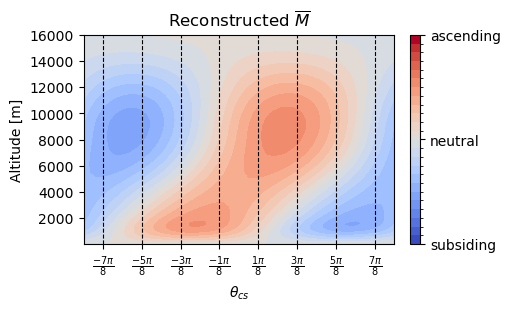

In [62]:
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
cmap = plt.cm.coolwarm
levels = np.linspace(-0.5, 0.5, 25)
mean_profiles.plot.contourf(
    ax=ax, cmap=cmap, levels=levels, y='z',
    cbar_kwargs={
        'ticks': [-0.5, 0.0, 0.5],
        'label': None
    }
)

# Then update tick labels
cbar = ax.collections[-1].colorbar
cbar.ax.set_yticklabels(['subsiding', 'neutral', 'ascending'])

ax.set_xlabel(r'$\theta_{cs}$')
ax.set_xlabel(r'$\theta_{cs}$')
ax.set_ylabel('Altitude [m]')

ax.set_yticks(np.arange(2000, 18000, 2000))

angles = np.arange(-7*np.pi/8, 7*np.pi/8 + 0.1, np.pi/4)

# Add vertical lines at those positions
for a in angles:
    ax.axvline(x=a, color="k", linestyle="--", linewidth=0.8)

# Set tick positions and labels
tick_labels = [
    rf"$\frac{{{n}\pi}}{{8}}$" if n != 0 else r"$0$"
    for n in range(-7, 8, 2)
]
ax.set_xticks(angles)
ax.set_xticklabels(tick_labels)
ax.set_title(r'Reconstructed $\overline{{M}}$')
save_figure(fig, 'reconstructed_large-scale_massflux.pdf')

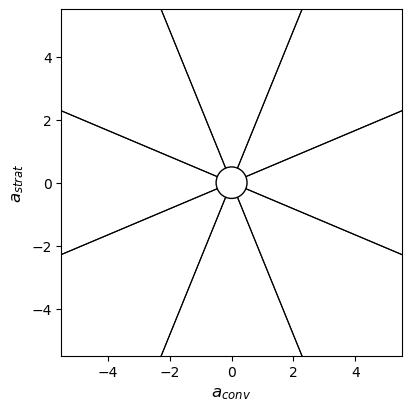

In [63]:
# Diagonal octant lines offset by 45/2 degrees (22.5°),
# drawn through the plot center to span the full axes.
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
cx, cy = (xmin + xmax) / 2, (ymin + ymax) / 2

angles = np.deg2rad(np.arange(22.5, 360, 45))  # 22.5°, 67.5°, ..., 337.5°
L = 100#2 * max(xmax - xmin, ymax - ymin)

for ang in angles:
    x0, y0 = cx - L*np.cos(ang), cy - L*np.sin(ang)
    x1, y1 = cx + L*np.cos(ang), cy + L*np.sin(ang)
    ax.plot([x0, x1], [y0, y1], '-', lw=0.8, color='k', alpha=1)

# Add circle of radius 0.5 at the origin
circle = patches.Circle(
    (cx, cy), 0.5, facecolor="white", edgecolor="k", zorder=10
)
ax.add_patch(circle)

ax.set_xlabel(r'$a_{conv}$', fontsize=12)
ax.set_ylabel(r'$a_{strat}$', fontsize=12)
save_figure(fig, 'octant_defitions.pdf')
